In [60]:
import pandas as pd
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from matplotlib import pyplot as plt
import os
import numpy as np
import seaborn as sns

In [277]:
raxml_real_data = pd.read_csv("/Users/noa/Workspace/bootstrap_results/remote_results/real_data_analysis/raxml_real_data.csv")
iqtree_real_data = pd.read_csv("/Users/noa/Workspace/bootstrap_results/remote_results/real_data_analysis/iqtree_real_data.csv")
summary = pd.read_csv("/Users/noa/Workspace/bootstrap_repo/real_data_evaluation/summary.csv")


In [278]:
pd.options.display.max_colwidth = 50
raxml_real_data["study_name"] = raxml_real_data['msa_path'].str.split('/').str[-2]
iqtree_real_data["study_name"] = iqtree_real_data['msa_path'].str.split('/').str[-2]

In [279]:
raxml_real_data = raxml_real_data.merge(summary, left_on = "study_name", right_on = "name")
iqtree_real_data = iqtree_real_data.merge(summary, left_on = "study_name", right_on = "name")

In [284]:
summary[['name','Missing_percent']]

Index(['Unnamed: 0', 'name', 'Total_matrix_cells', 'Undetermined_characters',
       'Missing_percent', 'No_variable_sites', 'Proportion_variable_sites',
       'Parsimony_informative_sites', 'Proportion_parsimony_informative',
       'AT_content', 'GC_content', 'dataset.DOI', 'dataset.alignment.datatype',
       'dataset.alignment.nchar', 'dataset.alignment.ntax',
       'dataset.alignment.partitions', 'dataset.genomes.bacterial',
       'dataset.genomes.chloroplast', 'dataset.genomes.dsDNA',
       'dataset.genomes.dsRNA', 'dataset.genomes.mitochondrial',
       'dataset.genomes.nuclear', 'dataset.genomes.ssDNA',
       'dataset.genomes.ssRNA', 'dataset.license', 'dataset.notes',
       'dataset.study clade.english', 'dataset.study clade.latin',
       'dataset.study clade.taxon ID', 'dataset.study root age',
       'dataset.timetree root age', 'dataset.used for tree inference',
       'study.DOI', 'study.reference', 'study.year'],
      dtype='object')

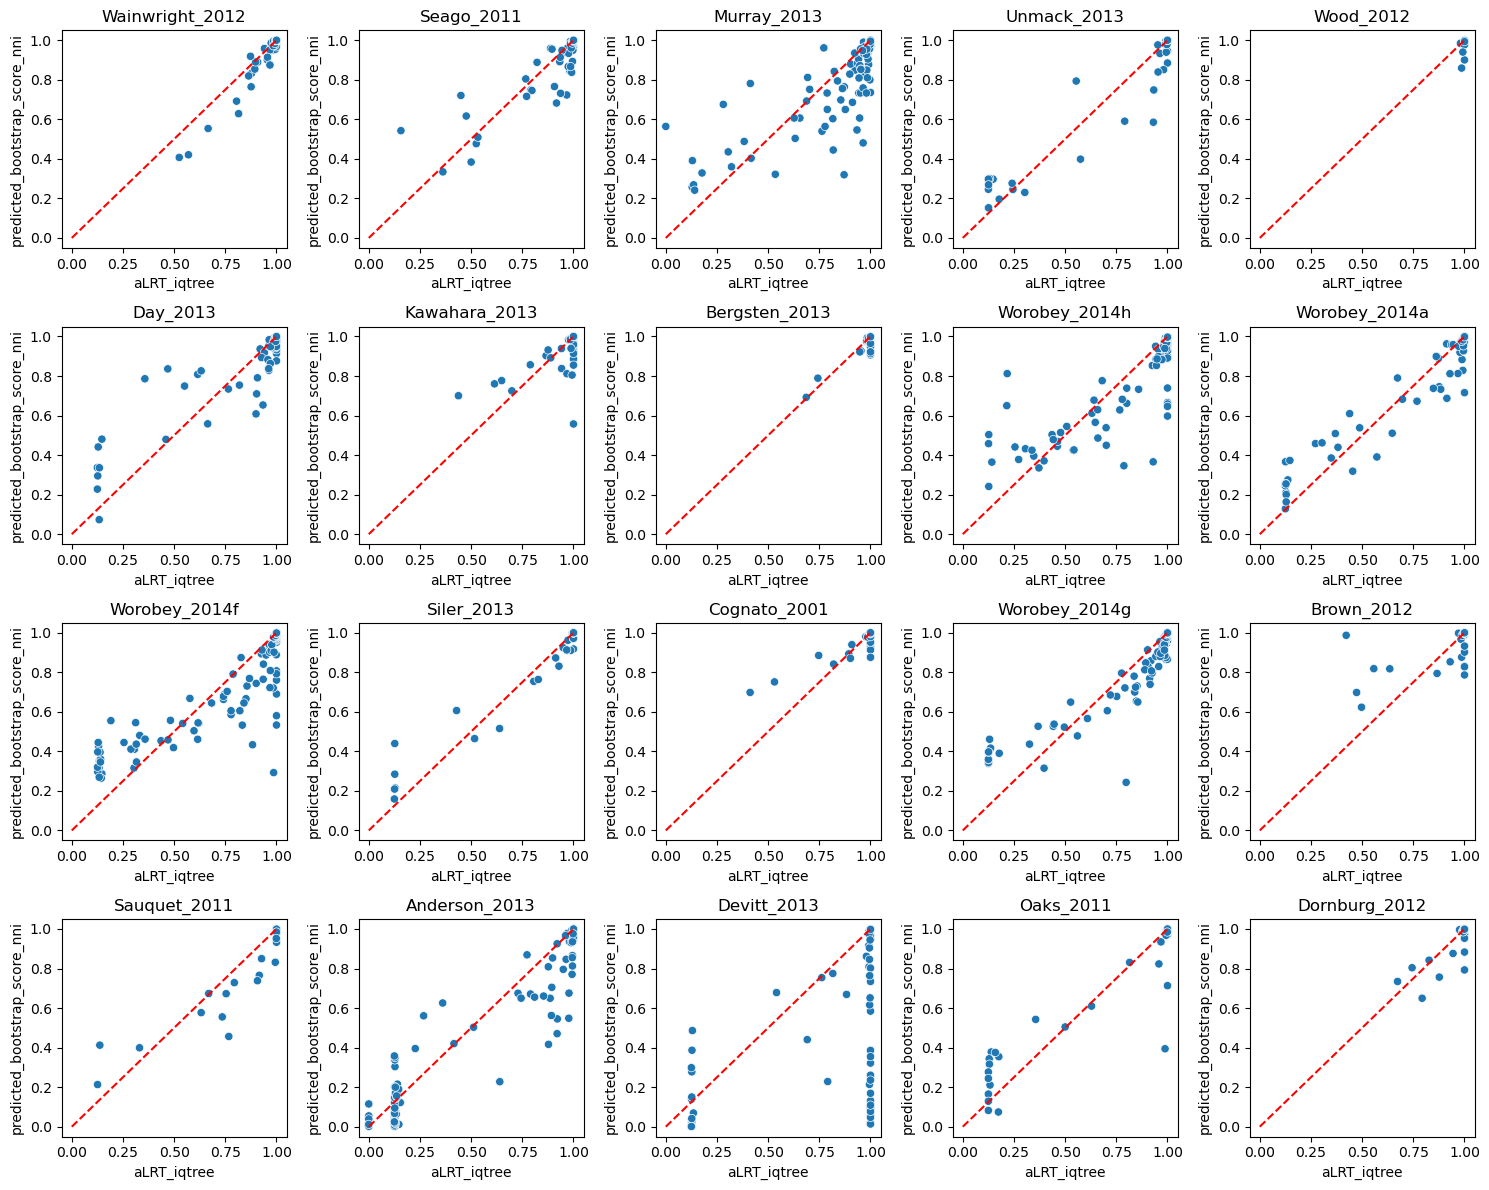

In [283]:
import matplotlib.pyplot as plt
import seaborn as sns

first_studies = iqtree_real_data['study_name'].unique()[:20]
fig, axes = plt.subplots(4, 5, figsize=(15, 12))

for idx, study in enumerate(first_studies):
    iqtree_real_data_small = iqtree_real_data.loc[raxml_real_data.study_name == study]
    i = idx // 5
    j = idx % 5    
    ax = axes[i, j]
    sns.scatterplot(y='predicted_bootstrap_score_nni', x='aLRT_iqtree', data=iqtree_real_data_small, hue="study_name", ax=ax)
    ax.plot([0, 1], [0, 1], color='red', linestyle='--', label='y = x')
    ax.set_title(study)
    ax.set_xlim(-0.05, 1.05)  # Set the x-axis limit to start at 0
    ax.set_ylim(-0.05, 1.05)  # Set the y-axis limit to start at 0
    ax.legend().remove()  # Remove the legend
    plt.tight_layout()
    
plt.tight_layout()
plt.show()

In [145]:
print(np.mean(iqtree_real_data['aLRT_iqtree']))
print(np.mean(iqtree_real_data['aBayes_iqtree']))
print(np.mean(iqtree_real_data['ultrafast_support']))
print(np.mean(iqtree_real_data['predicted_bootstrap_score_nni']))
print(np.mean(iqtree_real_data['predicted_bootstrap_score_no_nni']))

0.8948243416006137
0.8929621580158528
0.9129506520071593
0.8695342390946891
0.8883264793314367


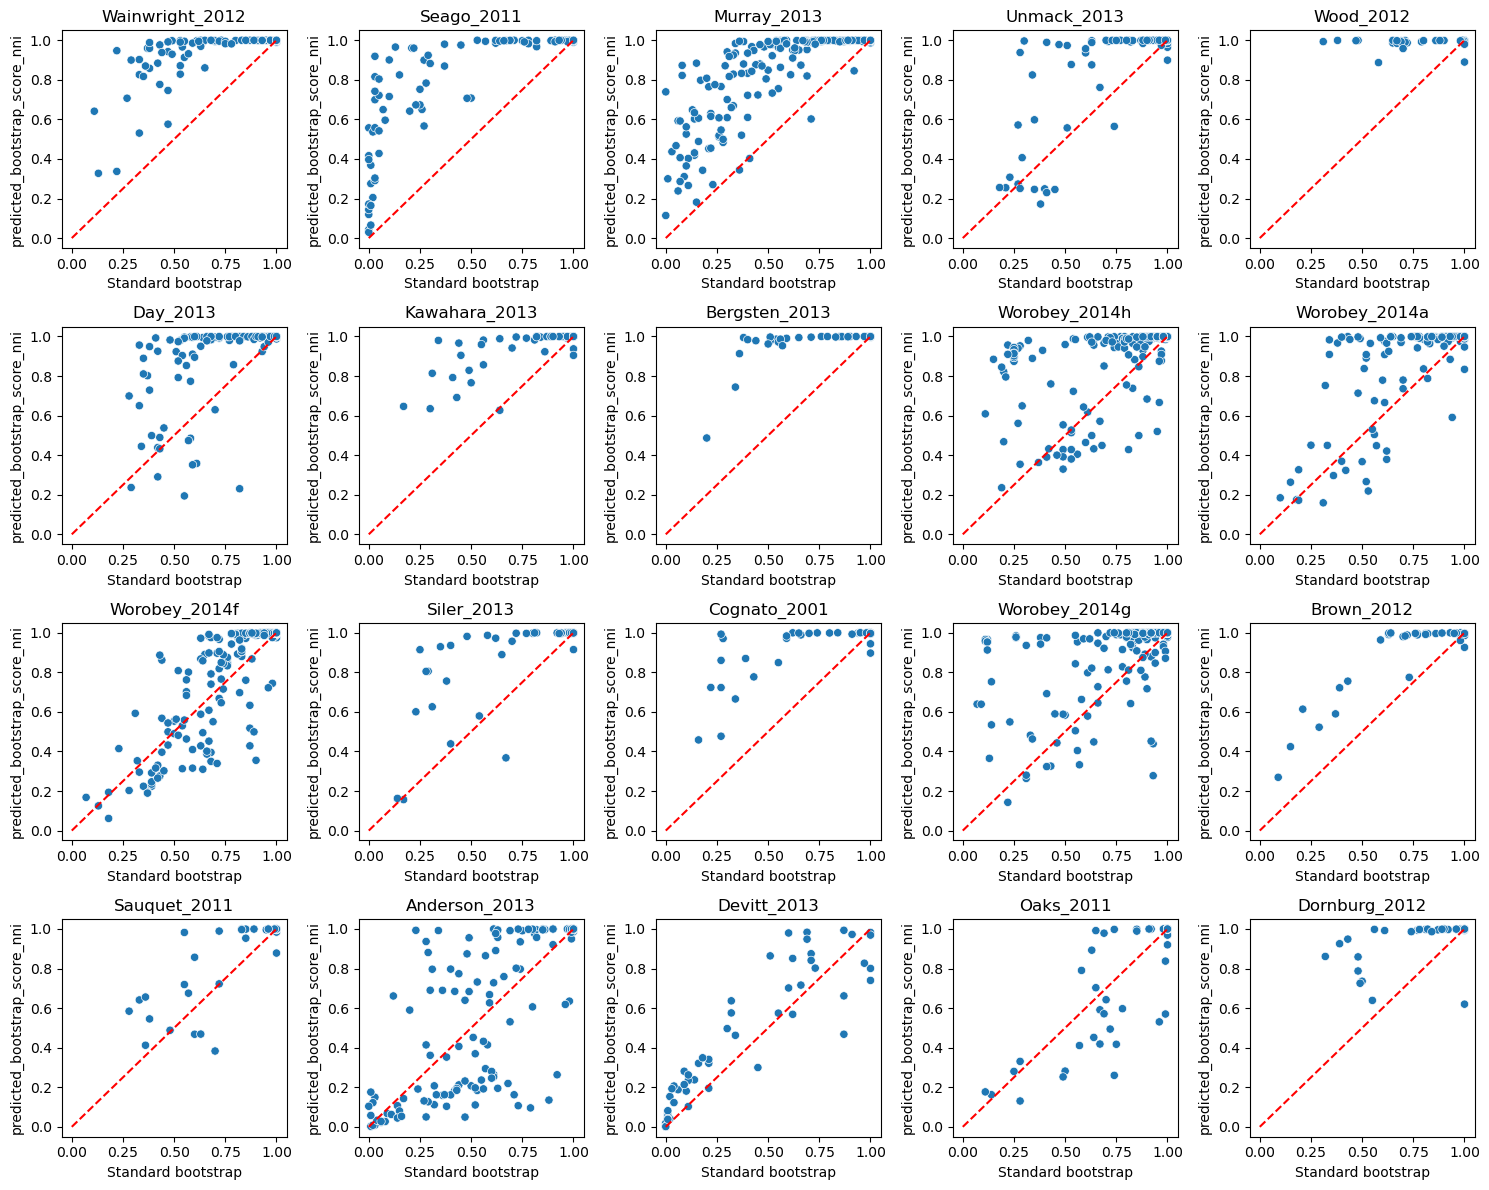

In [282]:
import matplotlib.pyplot as plt
import seaborn as sns

first_studies = raxml_real_data['study_name'].unique()[:20]
fig, axes = plt.subplots(4, 5, figsize=(15, 12))
raxml_real_data['Standard bootstrap'] = raxml_real_data.bootstrap_support / 100

for idx, study in enumerate(first_studies):
    raxml_real_data_small = raxml_real_data.loc[raxml_real_data.study_name == study]
    i = idx // 5
    j = idx % 5    
    ax = axes[i, j]
    sns.scatterplot(y='predicted_bootstrap_score_nni', x='Standard bootstrap', data=raxml_real_data_small, hue="study_name", ax=ax)
    ax.plot([0, 1], [0, 1], color='red', linestyle='--', label='y = x')
    ax.set_title(study)
    ax.set_xlim(-0.05, 1.05)  # Set the x-axis limit to start at 0
    ax.set_ylim(-0.05, 1.05)  # Set the y-axis limit to start at 0
    ax.legend().remove()  # Remove the legend
    plt.tight_layout()
    
plt.tight_layout()
plt.show()

In [191]:
print(np.mean(raxml_real_data['bootstrap_support']))
print(np.mean(raxml_real_data['tbe_raxml']))
print(np.mean(raxml_real_data['predicted_bootstrap_score_nni']))
print(np.mean(raxml_real_data['predicted_bootstrap_score_no_nni']))

74.90590641779596
0.8860602173357198
0.8557875939109184
0.862989449365441


In [179]:
np.unique(raxml_real_data['feature_msa_n_seq'])

array([ 32.,  38.,  41.,  44.,  51.,  61.,  69.,  70.,  79.,  92.,  94.,
        97., 139., 145., 146., 152., 188., 237., 326., 327., 332., 340.,
       351., 355.])